#### Assignment 2 : Fitting and Alignment
#### Name : Jayasinghe D.R.
#### Index No. : 190262L

### Question 1

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

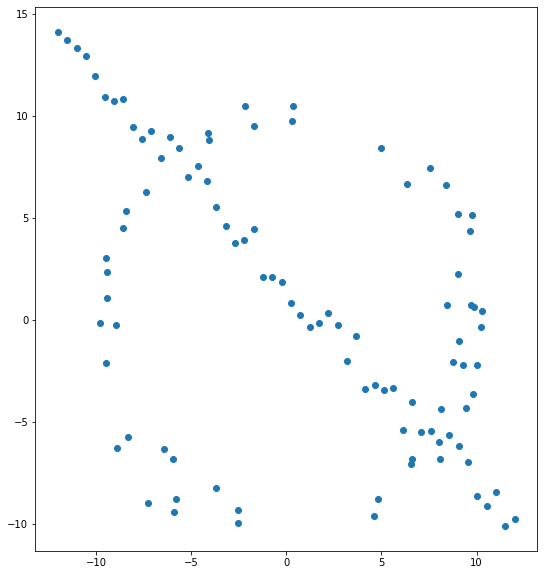

In [43]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape( half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1 )))

X = np.vstack((X_circ, X_line))

a = X[:,0] #1st column
b = X[:,1] #2nd column

#plotting the data set
plt.figure(figsize=(9, 10))
plt.plot(a, b, 'o')
plt.plot



In [4]:
def findCircle(pt1, pt2, pt3):
    x1, y1 = pt1[0], pt1[1]
    x2, y2 = pt2[0], pt2[1]
    x3, y3 = pt3[0], pt3[1]

    #detect if it is circle
    #if not (((y3 - y2)/(x3 - x2)) == ((y2 - y1)/(x2 - x1))):

    #circle equation 
    # x**2 + y**2 + 2gx + 2fy + c = 0
    a1 = x1 - x2
    a2 = x1 - x3

    b1 = y1 - y2
    b2 = y1 - y3

    c1 = (x2**2 - x1**2 + y2**2 - y1**2)/2
    c2 = (x3**2 - x1**2 + y3**2 - y1**2)/2

    A = np.array([[a1, b1], [a2, b2]], dtype=np.float32)
    C = np.array([[c1], [c2]], dtype=np.float32)

    g_f = np.linalg.pinv(A) @ C
    g = -g_f[0][0]
    f = -g_f[1][0]
    c = -(x1**2 + y1**2  + 2*g*x1 + 2*f*y1)
    
    r_sqaured = g**2 + f**2 - c

    if (r_sqaured > 0):
        #r = np.sqrt(r_sqaured)
        #print(g, f, r)
        r1 = np.sqrt((x1-g)**2 + (y1-f)**2)
        r2 = np.sqrt((x2-g)**2 + (y2-f)**2)
        r3 = np.sqrt((x3-g)**2 + (y3-f)**2)
        r = np.mean([r1, r2, r3])
        #print(r1, r2, r3)
        return (g, f, r)
    else:
        return None


In [45]:
def RANSAC(Set, a, b, r, t):
    in_t = r - t #inner threshold
    out_t = r + t #outer threshold
    inlier_arr=[]
    inlier_ct = 0
    error = 0

    for pt in Set:
        #iterate through each point in X
        x, y = pt[0], pt[1]
        #calc distance to point from centre of model circle     
        r_cal = np.sqrt((x-a)**2 + (y-b)**2)    

        if (in_t < r_cal < out_t) & (5 < r < 15):  
            #point lies within the threshold and 
            #radius is within a given range
            inlier_ct += 1
            error += np.abs(r_cal - r)
            inlier_arr.append(pt)

    return inlier_ct, inlier_arr, error

In [48]:
#implementing the RANSAC algorithm

N_1 = 35  #assuming an outlier ratio of 50% for 1st iteration
N_2 = 10 #assuming an outlier ratio of 10% for 2nd iterations
t = 1   #threshold
d_1 = 30  #concensus data size
d_2 = 40

ransac_candidates = []
ransac_inliers = []

max_count = 0 #finding the best fit circle
best_fit_cricle = [0, 0, 0]


for i in range(N_1):
    index = np.random.choice(X.shape[0], 3, replace=False) 
    ran_pts = X[index]
    a, b, r = findCircle(ran_pts[0], ran_pts[1], ran_pts[2])

    inlier_count, inlier_array, mean_error = RANSAC(X, a, b, r, t)

    #finding best fit circle
    if (inlier_count >= max_count) & (inlier_count > d_1):
        max_count = inlier_count
        best_fit_circle = [a, b, r]
        best_pts = ran_pts

    if inlier_count > d_1:
        for j in range(N_2):
            #testing the algorithm for selected inlier points
            inlier_array = np.array(inlier_array)
            index_1 = np.random.choice(inlier_array.shape[0], 3, replace=False)
            ran_pts_1 = inlier_array[index_1]
            a_1, b_1, r_1 = findCircle(ran_pts_1[0], ran_pts_1[1], ran_pts_1[2])

            inlier_count_1, inlier_array_1, mean_error_1 = RANSAC(X, a_1, b_1, r_1, t)

            if inlier_count_1 > d_2:
                ransac_candidates.append([a_1, b_1, r_1, inlier_count_1, mean_error_1/inlier_count_1])
                ransac_inliers.append(inlier_array_1)
    

#finding the bestfit circle
print(len(ransac_candidates))

for data in ransac_candidates:
    print(data)

29
[-0.255118, 0.8052044, 9.66694262374135, 44, 0.4618457024237949]
[0.11441113, 0.7820123, 9.72752696924884, 48, 0.40493747470953156]
[-0.017087191, 1.1190552, 10.045712998863856, 43, 0.4573747892737469]
[0.23718683, -0.124449074, 9.976326280574547, 51, 0.42366059495976927]
[0.40009862, 0.6561089, 9.860019828707712, 46, 0.34190041731167076]
[0.37826267, -0.11463255, 10.05206651182475, 47, 0.390597586956219]
[0.47274455, 0.08380641, 9.385614447451188, 46, 0.5004991282650231]
[0.34565714, -0.14842953, 10.309605865646928, 42, 0.35839744694141706]
[0.28558972, 0.79769576, 9.847503040226039, 48, 0.3873823958583449]
[-0.075134516, 0.69020516, 9.805506805928191, 48, 0.4401363272510159]
[-0.43490863, 0.97093487, 9.547501593660995, 41, 0.5107064885401598]
[0.02043495, 0.41585666, 9.823510925023266, 50, 0.41578007990493954]
[0.4964038, -0.011414643, 9.749534756017228, 50, 0.45347488364826316]
[-0.37778074, 0.57378596, 10.083670587983752, 48, 0.5367126750433663]
[0.61504984, 0.3558208, 9.9831236

In [49]:
#selecting the best candidate for RANSAC circle
s = len(ransac_candidates)
max_count = 0
min_error = 100000
rns_index = 0

for n in range(s):
    circ = ransac_candidates[n]
    if circ[3] > max_count:
        max_count = circ[3]
        min_error = circ[4]
        rns_index = n
    if (circ[3] == max_count) & (circ[4]<min_error):
        max_count = circ[3]
        min_error = circ[4]
        rns_index = n
        
#best RANSAC circle
#x_ransac, y_ransac, r_ransac = ransac_candidate
circ_RNS = ransac_candidates[rns_index]

print(circ_RNS)
print(len(ransac_inliers[rns_index]))

[0.23718683, -0.124449074, 9.976326280574547, 51, 0.42366059495976927]
51


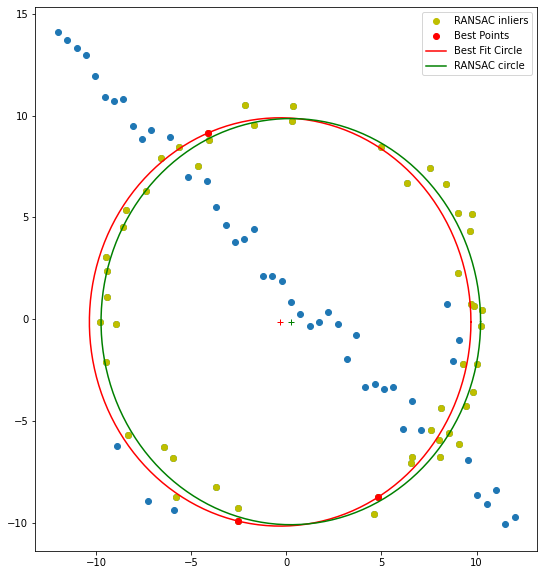

In [50]:
#plotting the best fit circle

#parameters of the best fit circle
x_0, y_0, r_0 = best_fit_circle[0], best_fit_circle[1], best_fit_circle[2]

#parameters of the RANSAC circle
x_RNS, y_RNS, r_RNS = circ_RNS[0], circ_RNS[1], circ_RNS[2]

plt.figure(figsize=(9, 10))

#plotting the data set
a = X[:,0] #1st column
b = X[:,1] #2nd column
plt.plot(a, b, 'o')

#plot RANSAC inliers
inliers = np.array(ransac_inliers[rns_index])
inlier_x = inliers[:,0]
inliers_y = inliers[:,1]
plt.plot(inlier_x, inliers_y, 'o', color='y', label= 'RANSAC inliers')

#best points
best_x = best_pts[:,0]
best_y = best_pts[:,1]
plt.plot(best_x, best_y, 'o', color='r', label= 'Best Points')

#plotting the best fit circle
theta = np.linspace( 0 , 2 * np.pi , 150 )
p = x_0 + r_0 * np.cos( theta )
q = y_0 + r_0 * np.sin( theta)
plt.plot(p, q, color='r', label='Best Fit Circle')

#plot the RANSAC circle
p = x_RNS + r_RNS * np.cos( theta )
q = y_RNS + r_RNS * np.sin( theta)
plt.plot(p, q, color='g', label='RANSAC circle')

#plot centre of best fit circle
plt.plot(x_0, y_0, '+', color='r')

#plot centre of RANSAC circle
plt.plot(x_RNS, y_RNS, '+', color='g')

plt.legend()

plt.show()

### Question 2

In [24]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Select points on the image using mouse click
# importing the module
import cv2
  
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
 
# driver function
if __name__=="__main__":
 
    # reading the image
    img = cv2.imread(r'stadium.jpg', 1)
 
    # displaying the image
    cv2.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
    
    # close the window
    cv2.destroyAllWindows()


217   276
459   274
609   363
76   372


In [30]:
def compute_homography(s, d):
    x_s, y_s = s[:, 0], s[:, 1]
    x_d, y_d = d[:, 0], d[:, 1]

    x_s, y_s = s[:, 0], s[:, 1]
    x_d, y_d = d[:, 0], d[:, 1]

    #creating matrix A
    A = np.array([
        [ x_s[0], y_s[0], 1, 0, 0, 0, -x_d[0]*x_s[0], -x_d[0]*y_s[0], -x_d[0] ],
        [ 0, 0, 0, x_s[0], y_s[0], 1, -y_d[0]*x_s[0], -y_d[0]*y_s[0], -y_d[0] ],

        [ x_s[1], y_s[1], 1, 0, 0, 0, -x_d[1]*x_s[1], -x_d[1]*y_s[1], -x_d[1] ],
        [ 0, 0, 0, x_s[1], y_s[1], 1, -y_d[1]*x_s[1], -y_d[1]*y_s[1], -y_d[1] ],

        [ x_s[2], y_s[2], 1, 0, 0, 0, -x_d[2]*x_s[2], -x_d[2]*y_s[2], -x_d[2] ],
        [ 0, 0, 0, x_s[2], y_s[2], 1, -y_d[2]*x_s[2], -y_d[2]*y_s[2], -y_d[2] ],

        [ x_s[3], y_s[3], 1, 0, 0, 0, -x_d[3]*x_s[3], -x_d[3]*y_s[3], -x_d[3] ],
        [ 0, 0, 0, x_s[3], y_s[3], 1, -y_d[3]*x_s[3], -y_d[3]*y_s[3], -y_d[3] ],
    ], dtype=np.float32)

    #eigen vector corresponding to the smallest eigen value for A
    W, V = np.linalg.eig(A.T @ A)
    eigen_vec = V[:, np.argmin(W)]
    eigen_vec = eigen_vec/eigen_vec[8]

    #reshaping the homography to 3x3 matrix
    homography = eigen_vec.reshape(3, 3)

    return homography

In [31]:
#Stadium & SL Cricket flag
s1 = np.array([[0, 0], [850, 0], [850, 460], [0, 460]])  #points on source image (sl_cricket_flag)
d1 = np.array([[217, 276], [459, 274], [609, 363], [76, 372]])  #points on destination image (staduim)
H1 = compute_homography(s1, d1)

#Seine River and French Flag
s2 = np.array([[0, 0], [1280, 0], [1280, 830], [0, 830]])
d2 = np.array([[235, 333], [475, 339], [751, 410], [216, 441]])
H2 = compute_homography(s2, d2)


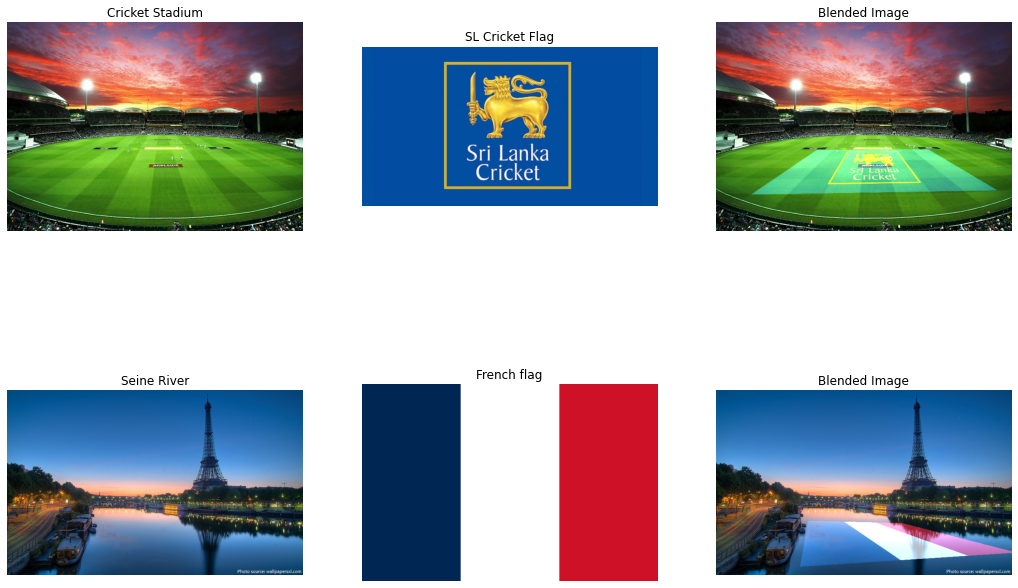

In [35]:
im1 = cv.imread('stadium.jpg', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('sl_cricket.jpg', cv.IMREAD_ANYCOLOR)

im3 = cv.imread('seine.jpg', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('drapeau_fr.png', cv.IMREAD_ANYCOLOR)

assert im1 is not None
assert im2 is not None
assert im3 is not None
assert im4 is not None

im2to1 = cv.warpPerspective(im2, H1, (640, 451))
im4to3 = cv.warpPerspective(im4, H2, (756, 472))

im_blended12 = cv.addWeighted(im1, 1, im2to1, 0.7, 0)
im_blended34 = cv.addWeighted(im3, 1, im4to3, 0.7, 0)

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0,0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Cricket Stadium')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[0,1].set_title('SL Cricket Flag')
ax[0,1].axis('off')

ax[0,2].imshow(cv.cvtColor(im_blended12, cv.COLOR_BGR2RGB))
ax[0,2].set_title('Blended Image')
ax[0,2].axis('off')

ax[1,0].imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Seine River')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(im4, cv.COLOR_BGR2RGB))
ax[1,1].set_title('French flag')
ax[1,1].axis('off')

ax[1,2].imshow(cv.cvtColor(im_blended34, cv.COLOR_BGR2RGB))
ax[1,2].set_title('Blended Image')
ax[1,2].axis('off')

plt.show()


### Question 3

In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

No. of matches: 616


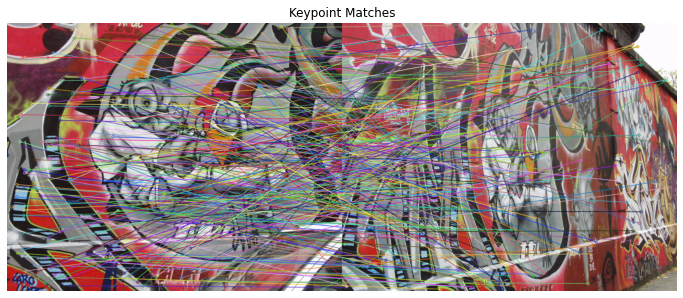

In [3]:
#Compute and match SIFT features
im1_col = cv.imread(r'graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5_col = cv.imread(r'graf/img5.ppm', cv.IMREAD_ANYCOLOR)
assert im1_col is not None
assert im5_col is not None

im1 = cv.cvtColor(im1_col, cv.COLOR_BGR2GRAY)
im5 = cv.cvtColor(im5_col, cv.COLOR_BGR2GRAY)

#sift
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(im1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(im5,None)

#feature matching
#for feature matching the Brute Force matcher algorithm is used
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

print("No. of matches:", len(matches))

im3 = cv.drawMatches(im1_col, keypoints_1, im5_col, keypoints_2, matches[:300], im5_col, flags=2)
plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
plt.title('Keypoint Matches')
plt.axis('off')
plt.show()

In [4]:
#get the keypoints correspnding to the matches with distance less than 800
k_pts1 = [] 
k_pts2 = []

for m in matches:
    k_pts1.append(keypoints_1[m.queryIdx].pt)
    k_pts2.append(keypoints_2[m.trainIdx].pt)

In [5]:
def compute_homography(s, d):
    x_s, y_s = s[:, 0], s[:, 1]
    x_d, y_d = d[:, 0], d[:, 1]

    x_s, y_s = s[:, 0], s[:, 1]
    x_d, y_d = d[:, 0], d[:, 1]

    #creating matrix A
    A = np.array([
        [ x_s[0], y_s[0], 1, 0, 0, 0, -x_d[0]*x_s[0], -x_d[0]*y_s[0], -x_d[0] ],
        [ 0, 0, 0, x_s[0], y_s[0], 1, -y_d[0]*x_s[0], -y_d[0]*y_s[0], -y_d[0] ],

        [ x_s[1], y_s[1], 1, 0, 0, 0, -x_d[1]*x_s[1], -x_d[1]*y_s[1], -x_d[1] ],
        [ 0, 0, 0, x_s[1], y_s[1], 1, -y_d[1]*x_s[1], -y_d[1]*y_s[1], -y_d[1] ],

        [ x_s[2], y_s[2], 1, 0, 0, 0, -x_d[2]*x_s[2], -x_d[2]*y_s[2], -x_d[2] ],
        [ 0, 0, 0, x_s[2], y_s[2], 1, -y_d[2]*x_s[2], -y_d[2]*y_s[2], -y_d[2] ],

        [ x_s[3], y_s[3], 1, 0, 0, 0, -x_d[3]*x_s[3], -x_d[3]*y_s[3], -x_d[3] ],
        [ 0, 0, 0, x_s[3], y_s[3], 1, -y_d[3]*x_s[3], -y_d[3]*y_s[3], -y_d[3] ],
    ], dtype=np.float32)

    #eigen vector corresponding to the smallest eigen value for A
    W, V = np.linalg.eig(A.T @ A)
    eigen_vec = V[:, np.argmin(W)]
    eigen_vec = eigen_vec/eigen_vec[8]

    #reshaping the homography to 3x3 matrix
    homography = eigen_vec.reshape(3, 3)

    return homography

In [6]:
#Function to implement the RANSAC algorithm for the matching keypoints
def RANSAC_Q3(pts1, pts2, idx, h, t):
    inlier_src = [] 
    inlier_dest = []
    inlier_ct = 0   #inlier count
    error_tot = 0   #total error for given point

    for i in range(len(pts1)):
        s = pts1[i,:]
        d = pts2[i,:]
        s_pts = np.array(np.append(s, 1)).reshape(3,1)  #source image points
        d_pts = np.array(np.append(d, 1)).reshape(3,1)  #destination image points

        h_pts = h @ s_pts   #points calculated using homography
        h_pts = h_pts / h_pts[2,0]

        err = np.sqrt((d_pts[0, 0] - h_pts[0,0])**2 +
                    (d_pts[1,0] - h_pts[1,0])**2)

        if (err < t):
            inlier_ct += 1
            error_tot += err
            inlier_src.append(s)    #append the corresponding source points
            inlier_dest.append(d)    #append the corresponding destination points
            
    return inlier_ct, inlier_src, inlier_dest, error_tot

In [53]:
#selecting 4 random points and computing homography
assert len(k_pts1) == len(k_pts2)

k_pts1 = np.array(k_pts1)
k_pts2 = np.array(k_pts2)

N = 100  #number of iterations
t_1 = 50 #threshold 1
t_2 = 30    #threshold 2
d1 = 10    #threshold inlier count
d2 = 18
candidate_pts = []
final_inlier_ct = []
mean_err_arr = []

for j in range(N):
    index = np.random.choice(k_pts1.shape[0], 4, replace=False) 
    s_1 = k_pts1[index] #source points
    d_1 = k_pts2[index] #destination points  

    tr_1 = compute_homography(s_1, d_1) #homography for the given point set

    inlier_count, keypts_src, keypts_dest, error_tot = RANSAC_Q3(k_pts1, k_pts2, index, tr_1, t_1)

    keypts_src = np.array(keypts_src)
    keypts_dest = np.array(keypts_dest)

    if inlier_count > d1:
        #second RANSAC iteration
        for m in range(10):
            #testing for the selected inlier_points
            index_1 = np.random.choice(inlier_count, 4, replace=False)
            s_2 = keypts_src[index_1]
            d_2 = keypts_dest[index_1]

            tr_2 = compute_homography(s_2, d_2)

            inlier_count_1, keypts_src_1, keypts_dest_1, error_tot_1 = RANSAC_Q3(k_pts1, k_pts2, index_1, tr_2, t_2)

            mean_error = error_tot_1/inlier_count_1

            if (inlier_count_1 > d2) and (mean_error < 15):
                candidate_pts.append(tr_2)
                final_inlier_ct.append(inlier_count_1)
                mean_err_arr.append(mean_error)

In [54]:
print(candidate_pts)
print(final_inlier_ct)
print(mean_err_arr)

[array([[ 5.4751569e-01,  1.3596460e-01,  2.2171429e+02],
       [ 1.5972297e-01,  1.2731992e+00, -3.5968048e+01],
       [ 2.7092473e-04,  1.9515317e-04,  1.0000000e+00]], dtype=float32)]
[53]
[9.12321575181284]


In [56]:
#obtaining the Homography with most inliers
max_index = final_inlier_ct.index(max(final_inlier_ct))
#min_index = mean_err_arr.index(min(mean_err_arr))

#Most appropriate homography
#H_selected = candidate_pts[min_index]
H_selected = candidate_pts[max_index]

H_selected = np.linalg.inv(H_selected)

print(H_selected)


[[ 2.10447788e+00 -1.52378231e-01 -4.72073608e+02]
 [-2.78578103e-01  8.01287591e-01  9.05854950e+01]
 [-5.15789725e-04 -1.15090785e-04  1.11021841e+00]]


In [57]:
H_given =   np.array([[6.2544644e-01, 5.7759174e-02, 2.2201217e+02], 
[2.2240536e-01, 1.1652147e+00, -2.5605611e+01], 
[4.9212545e-04, -3.6542424e-05, 1.0000000e+00]])

H_given = np.linalg.inv(H_given)
print(H_given)

[[ 1.98849651e+00 -1.12504231e-01 -4.44351164e+02]
 [-4.01372580e-01  8.81609323e-01  1.11683743e+02]
 [-9.93256865e-04  8.75823372e-05  1.22275771e+00]]


(-0.5, 799.5, 639.5, -0.5)

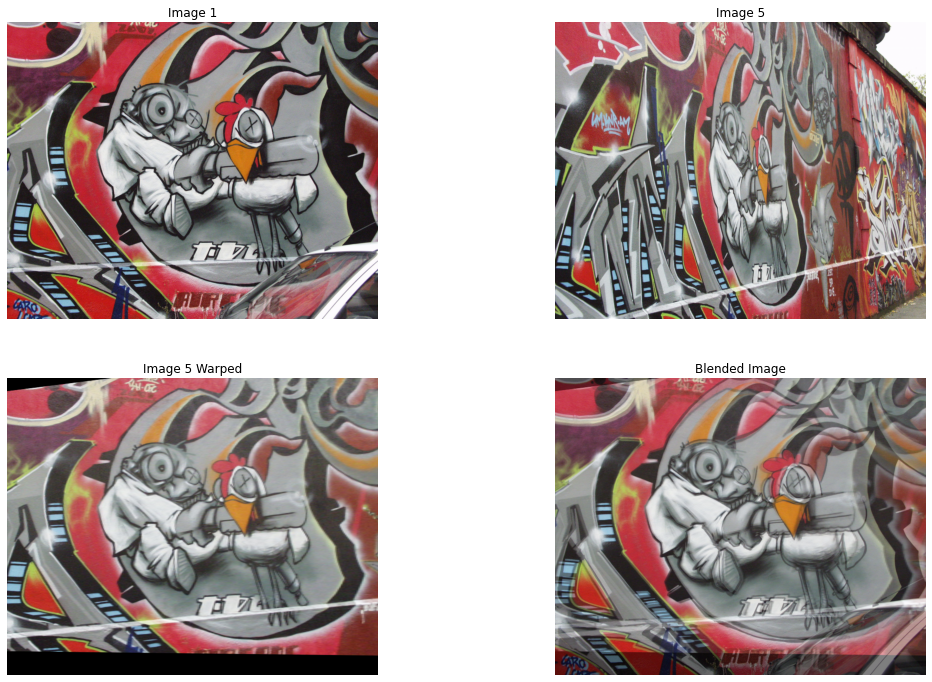

In [61]:
im5to1 = cv.warpPerspective(im5_col, H_selected, (800, 640))

im_blended = cv.addWeighted(im1_col, 0.5, im5to1, 0.5, 0)

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0,0].imshow(cv.cvtColor(im1_col, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Image 1')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(im5_col, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Image 5')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(im5to1, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Image 5 Warped')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(im_blended, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Blended Image')
ax[1,1].axis('off')